In [1]:
import os
import cv2
import matplotlib


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
#from catterplot import catter
context = {"font.family":'serif', "xtick.labelsize":15,
           "ytick.labelsize":15, "axes.labelsize":20, "legend.fontsize":12}

loadPics = True

In [2]:
if loadPics == True:
    files = np.sort(os.listdir('BG_removed_images/'))
    colorMap = {'BK':0, 'BW':1, 'CL':2, 'GR':3, 'GW':4, 'OG':5, 'OW':6, 'RD':7,
                'SM':8, 'TB':9, 'TS':10, 'WT':11}
    df = pd.DataFrame(columns=['type', 'cat', 'lat', 'lon', 'R', 'G', 'B', 'color', 'scale'])
    bad = []
    for file in files:
        cat, lat, lon = file.split('_')
        subtype = cat[0:2]
        cat = int(cat[2:])
        lat = int(lat.split('t')[1])
        lon = float(lon.split('n')[1].split('.')[0])
        img = Image.open('BG_removed_images/'+file).convert('RGBA')
        img = np.array(img)
        r, g, b, a = np.rollaxis(img, axis = -1)
        mindist = 10
        maxdist = 10
        minindex = None
        maxindex = None
        scale = 'O'
        newR = r[a!=0]
        newG = g[a!=0]
        newB = b[a!=0]
        minzero = np.min(np.sqrt(newR**2.+newG**2.+newB**2.))
        maxzero = np.min(np.sqrt((newR-255.)**2+(newG-255.)**2+(newB-255.)**2))
        if minzero < mindist:
            minindex = np.argmin(np.sqrt(newR**2.+newG**2.+newB**2.))
            mindist = minzero
        if maxzero < maxdist:
            maxindex = np.argmin(np.sqrt((newR-255.)**2+(newG-255.)**2+(newB-255.)**2))
            maxdist = maxzero
        if (minindex is not None) and (maxindex is not None): # both black and white exist
            minR = newR[minindex]
            maxR = newR[maxindex]
            scaleR = (newR-minR)/(maxR-minR)*255.
            minG = newG[minindex]
            maxG = newG[maxindex]
            scaleG = (newG-minG)/(maxG-minG)*255.
            minB = newB[minindex]
            maxB = newB[maxindex]
            scaleB = (newB-minB)/(maxB-minB)*255.
            scale = 'BW'
        if (minindex is not None) and (maxindex is None): # only black exists
            minR = newR[minindex]
            maxR = np.max(newR)
            scaleR = (newR-minR)/(maxR-minR)*maxR
            minG = newG[minindex]
            maxG = np.max(newG)
            scaleG = (newG-minG)/(maxG-minG)*maxG
            minB = newB[minindex]
            maxB = np.max(newB)
            scaleB = (newB-minB)/(maxB-minB)*maxB
            scale = 'B'
        if (minindex is None) and (maxindex is not None): # only white exists
            minR = np.min(newR)
            maxR = newR[maxindex]
            scaleR = (newR-minR)/(maxR-minR)*(255.-minR)+minR
            minG = np.min(newG)
            maxG = newG[maxindex]
            scaleG = (newG-minG)/(maxG-minG)*(255.-minG)+minG
            minB = np.min(newB)
            maxB = newB[maxindex]
            scaleB = (newB-minR)/(maxB-minB)*(255.-minB)+minB
            scale = 'W'
        if (minindex is None) and (maxindex is None): # no scaling
            scaleR = newR
            scaleB = newG
            scaleG = newB
            scale = ''
        Ravg = np.sqrt(np.sum(scaleR**2.)/len(scaleR))
        Gavg = np.sqrt(np.sum(scaleG**2.)/len(scaleG))
        Bavg = np.sqrt(np.sum(scaleB**2.)/len(scaleB))
        df = df.append({'type':subtype, 'cat':cat, 'lat':lat, 'lon':lon, 'scale':scale,
                        'R':Ravg, 'G':Gavg, 'B':Bavg, 'color':colorMap[subtype]}, ignore_index=True)
        if np.abs(lon) == 180:
            df = df.append({'type':subtype, 'cat':cat, 'lat':lat, 'lon':-lon, 'scale':scale,
                        'R':Ravg, 'G':Gavg, 'B':Bavg, 'color':colorMap[subtype]}, ignore_index=True)
    print(df)
    df.to_csv('catpd.csv', index=False)
else:
    df = pd.read_csv('catpd.csv')

    type cat lat    lon           R           G           B color scale
0     BK   3   0    0.0   62.082007   57.630904   53.336947     0    BW
1     BK   4   0 -135.0   50.488926   52.986971   51.556709     0    BW
2     BK   4   0    0.0   72.016139   67.309565   62.792369     0    BW
3     BK   4   0  135.0   75.661914   72.430123   70.641286     0    BW
4     BK   5   0  -45.0   62.346818   59.265104   55.020519     0     B
..   ...  ..  ..    ...         ...         ...         ...   ...   ...
386   WT   6   0  135.0  141.672706  158.004312  167.736330    11    BW
387   WT   6   0  180.0  162.755784  159.579721  154.968404    11    BW
388   WT   6   0 -180.0  162.755784  159.579721  154.968404    11    BW
389   WT   6   0   45.0  201.051524  179.946813  162.163680    11    BW
390   WT   6   0   90.0  166.515449  149.811152  127.176964    11    BW

[391 rows x 9 columns]


BK [1 2 2 1 7 3 2 1 1]
BW [ 6  7  7 11 16  7  7  6  6]
CL [ 8  4  5  6 17  9  6  6  8]
GR [0 0 0 0 1 0 0 0 0]
GW [4 0 1 1 7 3 2 1 4]
OG [2 1 2 1 5 0 2 1 2]
OW [1 2 2 2 8 0 4 2 1]
RD [1 0 0 0 1 0 0 0 1]
SM [0 0 1 0 1 0 0 0 0]
TB [12  5 15  9 35 13 12  9 12]
TS [3 0 2 3 6 2 1 0 3]
WT [2 1 2 2 5 3 2 1 2]


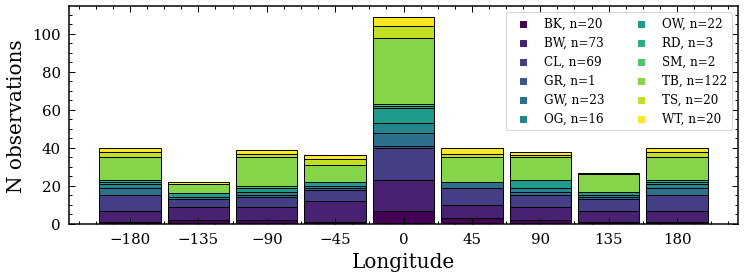

In [3]:
with matplotlib.rc_context(context):
    plt.figure(figsize=(12,4))
    colors = []
    for subtype in np.unique(df['type']):
        color = plt.cm.viridis(df['color'][df['type']==subtype].iloc[0]/11)
        colors.append(color)
        n,_ = np.histogram(df['lon'][df['type']==subtype], bins=np.arange(-180-45/2,180+45/2+1,45))
        print(subtype, n)
        plt.scatter([],[], marker='s', color=color, label=f"{subtype}, n={len(df['lon'][df['type']==subtype])}")
    plt.hist([df['lon'][df['type']==subtype] for subtype in np.unique(df['type'])], 
             bins=np.arange(-180-45/2,180+45/2+1,45), stacked=True, rwidth=0.9, 
             color=colors, edgecolor='k', align='mid')
    plt.legend(ncol=2)
    plt.ylabel('N observations')
    plt.xlabel('Longitude')
    plt.xticks(np.arange(-180,181,45))
    plt.show()

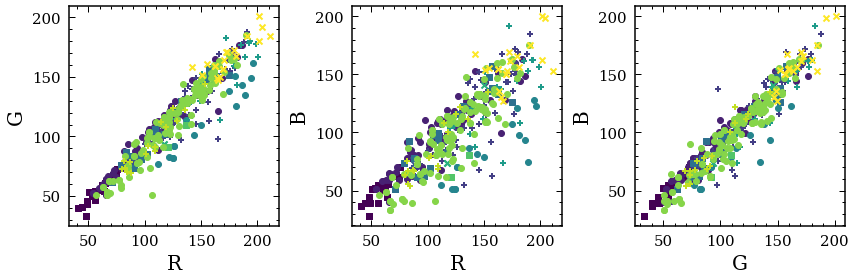

In [4]:
with matplotlib.rc_context(context):
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    symbols = ['s', 'o', '+', 'x']
    for i,(subtype,color) in enumerate(zip(np.unique(df['type']),colors)):
        ax[0].scatter(df['R'][df['type']==subtype], df['G'][df['type']==subtype], 
                      color=color, marker=symbols[i%4])
    ax[0].set_xlabel('R')
    ax[0].set_ylabel('G')

    for i,(subtype,color) in enumerate(zip(np.unique(df['type']),colors)):
        ax[1].scatter(df['R'][df['type']==subtype], df['B'][df['type']==subtype], 
                      color=color, marker=symbols[i%4])
    ax[1].set_xlabel('R')
    ax[1].set_ylabel('B')

    for i,(subtype,color) in enumerate(zip(np.unique(df['type']),colors)):
        ax[2].scatter(df['G'][df['type']==subtype], df['B'][df['type']==subtype], 
                      color=color, marker=symbols[i%4])
    ax[2].set_xlabel('G')
    ax[2].set_ylabel('B')
    plt.tight_layout()
    plt.show()

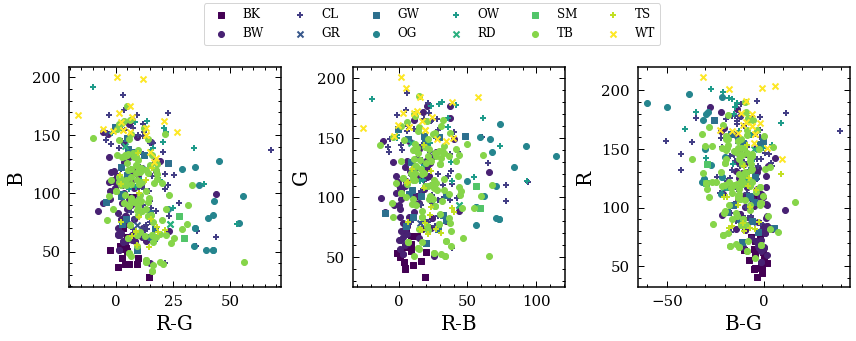

In [5]:
with matplotlib.rc_context(context):
    symbols = ['s', 'o', '+', 'x']
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    for i,(subtype,color) in enumerate(zip(np.unique(df['type']),colors)):
        ax[0].scatter(df['R'][df['type']==subtype]-df['G'][df['type']==subtype], 
                      df['B'][df['type']==subtype], color=color, marker=symbols[i%4], label=subtype)
    ax[0].set_xlabel('R-G')
    ax[0].set_ylabel('B')

    for i,(subtype,color) in enumerate(zip(np.unique(df['type']),colors)):
        ax[1].scatter(df['R'][df['type']==subtype]-df['B'][df['type']==subtype], 
                      df['G'][df['type']==subtype], color=color, marker=symbols[i%4])
    ax[1].set_xlabel('R-B')
    ax[1].set_ylabel('G')

    for i,(subtype,color) in enumerate(zip(np.unique(df['type']),colors)):
        ax[2].scatter(df['B'][df['type']==subtype]-df['G'][df['type']==subtype], 
                      df['R'][df['type']==subtype], color=color, marker=symbols[i%4])
    ax[2].set_xlabel('B-G')
    ax[2].set_ylabel('R')
    fig.legend(bbox_to_anchor=[0.5,1.1], ncol=6, loc='center')
    plt.tight_layout()
    plt.show()

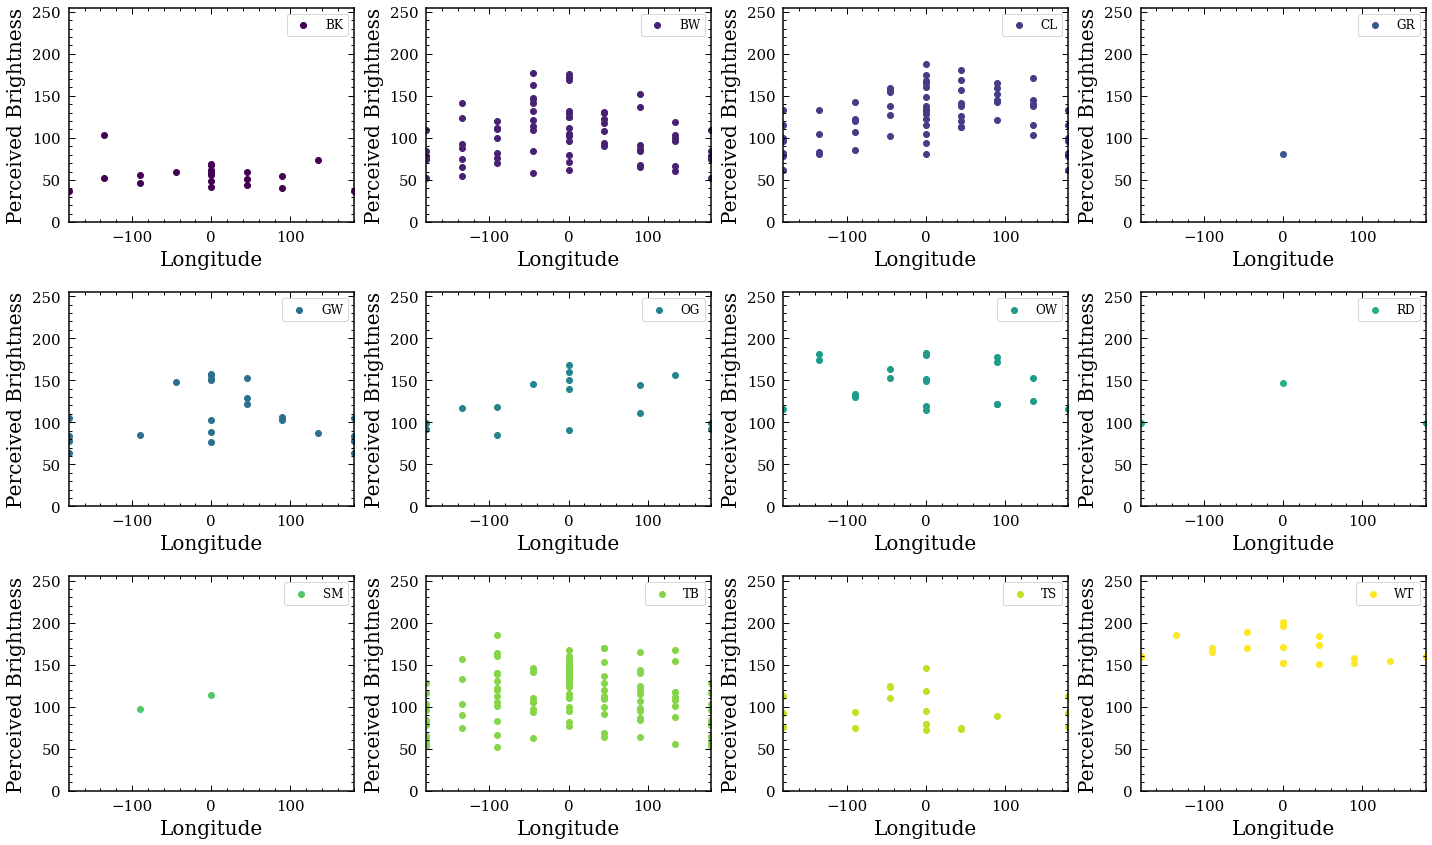

In [6]:
with matplotlib.rc_context(context):
    fig, ax = plt.subplots(3,4, figsize=(20,12))
    axes = ax.flatten()
    for i,(subtype,color) in enumerate(zip(np.unique(df['type']),colors)):
        avgbright = 0.299*(df['R'][df['type']==subtype]) + \
        0.587*(df['G'][df['type']==subtype]) + \
        0.114*(df['B'][df['type']==subtype])
        #(0.299*R + 0.587*G + 0.114*B), https://www.w3.org/TR/AERT/#color-contrast
        axes[i].scatter(df['lon'][df['type']==subtype], avgbright, color=color, label=subtype)
        axes[i].set_ylim(0,255)
        axes[i].set_xlim(-180,180)
        axes[i].set_xlabel('Longitude')
        axes[i].set_ylabel('Perceived Brightness')
        axes[i].legend()
    plt.tight_layout()
    plt.show()

BW: 1 6 7 15 23 
CL: 1 3 4 5 7 19 23 
GW: 2 10 
OG: 1 3 
OW: 11 
TB: 13 18 21 23 26 28 29 32 41 46 47 48 
TS: 3 
WT: 5 6 


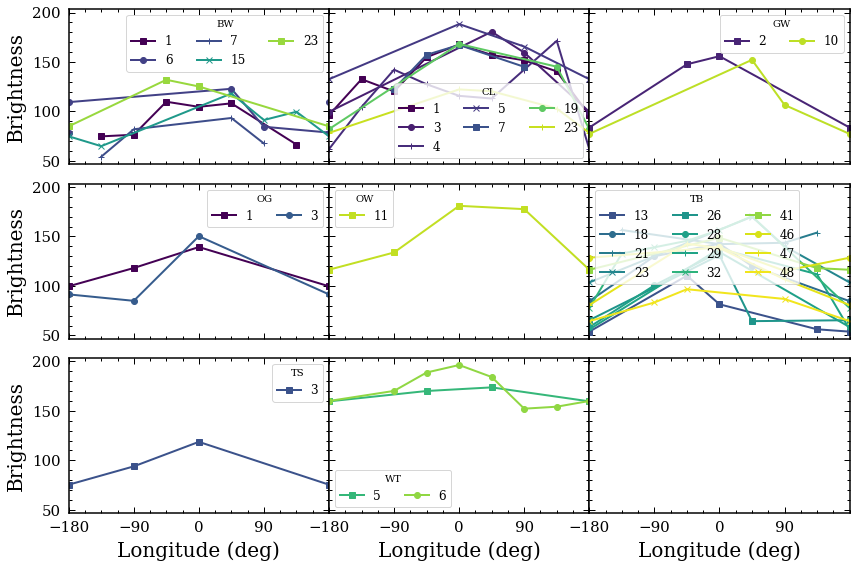

In [7]:
with matplotlib.rc_context(context):
    symbols = ['s', 'o', '+', 'x']
    types = []
    for subtype in np.unique(df['type']):
        for cat in np.unique(df['cat'][df['type']==subtype]):
            if len(df['cat'][(df['type']==subtype) & (df['cat'] == cat)]) >= 4:
                types.append(subtype)
    types = np.unique(types)
    fig, axes = plt.subplots(int(np.ceil(len(types)/3.)), 3, figsize=(12,len(types)), sharey=True, sharex=True)
    ax = axes.flatten()
    for i,subtype in enumerate(types):
        color = plt.cm.viridis(df['color'][df['type']==subtype].iloc[0]/11)
        string = subtype + ': '
        count = 0
        for j,cat in enumerate(np.unique(df['cat'][df['type']==subtype])):
            if len(df['cat'][(df['type']==subtype) & (df['cat'] == cat)]) >= 4:
                index = df['cat'].loc[(df['type']==subtype) & (df['cat'] == cat)].index
                sortindex = np.argsort(df['lon'][index])
                avgbright = 0.299*(df['R'][index[sortindex]]) + \
                    0.587*(df['G'][index[sortindex]]) + \
                    0.114*(df['B'][index[sortindex]])
                ax[i].plot(df['lon'][index[sortindex]], avgbright, 
                               color=plt.cm.viridis(j/len(np.unique(df['cat'][df['type']==subtype]))), 
                               label=cat, marker=symbols[count % 4])
                string += f"{cat} "
                count += 1
        print(string)
        ax[i].legend(ncol=3, title=subtype)
    for ax in axes[:,0]:
        ax.set_ylabel('Brightness')
    axes[0,0].set_xlim(-180,180)
    axes[0,0].set_xticks(np.arange(-180,180,90))
    axes[-1,0].set_xlabel('Longitude (deg)')
    axes[-1,1].set_xlabel('Longitude (deg)')
    axes[-1,2].set_xlabel('Longitude (deg)')
    #axes[0,0].set_ylim(0,255)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0)
    plt.show()

BW: 1 6 7 15 23 
CL: 1 3 4 5 7 19 23 
GW: 2 10 
OG: 1 3 
OW: 11 
TB: 13 18 21 23 26 28 29 32 41 46 47 48 
TS: 3 
WT: 5 6 


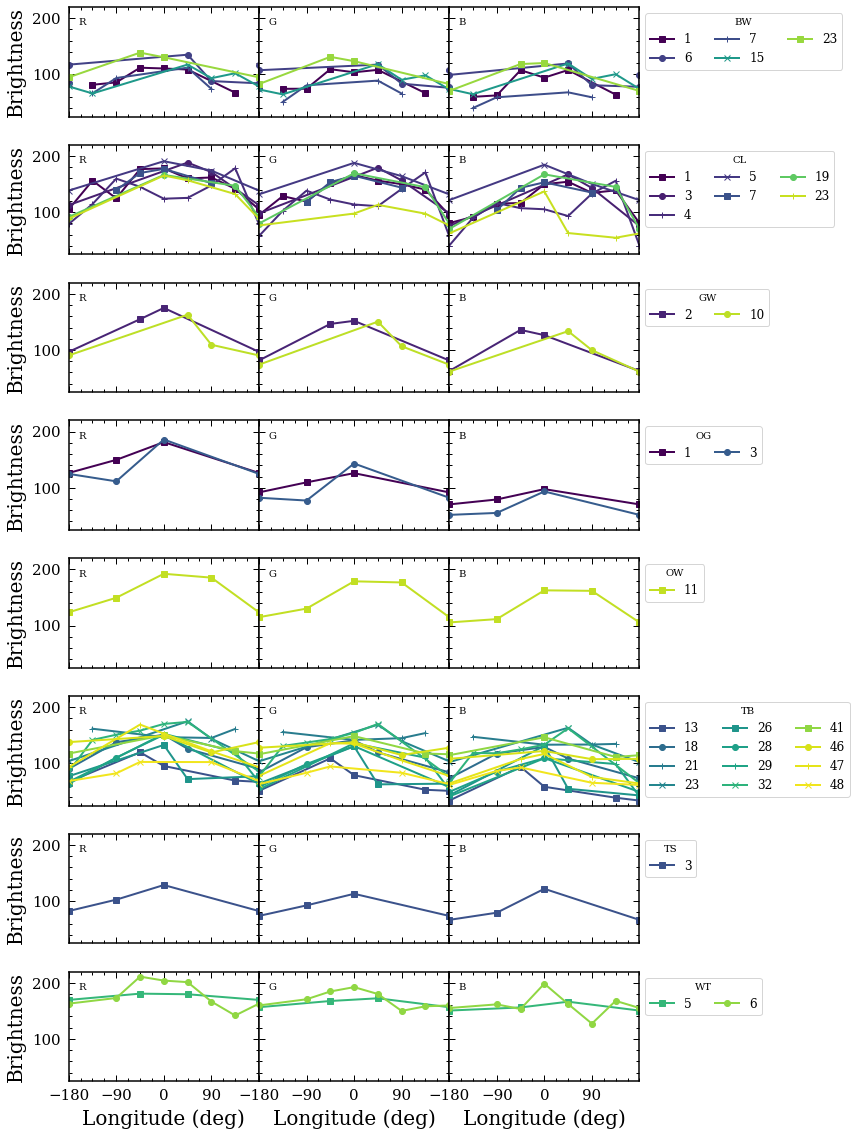

In [8]:
with matplotlib.rc_context(context):
    symbols = ['s', 'o', '+', 'x']
    types = []
    for subtype in np.unique(df['type']):
        for cat in np.unique(df['cat'][df['type']==subtype]):
            if len(df['cat'][(df['type']==subtype) & (df['cat'] == cat)]) >= 4:
                types.append(subtype)
    types = np.unique(types)
    fig, axes = plt.subplots(len(types),3, figsize=(12,len(types)*2), sharey=True, sharex=True)
    for i,subtype in enumerate(types):
        color = plt.cm.viridis(df['color'][df['type']==subtype].iloc[0]/11)
        string = subtype + ': '
        count = 0
        for j,cat in enumerate(np.unique(df['cat'][df['type']==subtype])):
            if len(df['cat'][(df['type']==subtype) & (df['cat'] == cat)]) >= 4:
                index = df['cat'].loc[(df['type']==subtype) & (df['cat'] == cat)].index
                sortindex = np.argsort(df['lon'][index])
                axes[i,0].plot(df['lon'][index[sortindex]], df['R'][index[sortindex]], 
                               color=plt.cm.viridis(j/len(np.unique(df['cat'][df['type']==subtype]))), 
                               label=cat, marker=symbols[count % 4])
                axes[i,1].plot(df['lon'][index[sortindex]], df['G'][index[sortindex]], 
                               color=plt.cm.viridis(j/len(np.unique(df['cat'][df['type']==subtype]))), 
                               label=cat, marker=symbols[count % 4])
                axes[i,2].plot(df['lon'][index[sortindex]], df['B'][index[sortindex]], 
                               color=plt.cm.viridis(j/len(np.unique(df['cat'][df['type']==subtype]))), 
                               label=cat, marker=symbols[count % 4])
                string += f"{cat} "
                count += 1
        print(string)
        axes[i,0].text(0.05,0.9, 'R', va='top', ha='left', transform=axes[i,0].transAxes)
        axes[i,1].text(0.05,0.9, 'G', va='top', ha='left', transform=axes[i,1].transAxes)
        axes[i,2].text(0.05,0.9, 'B', va='top', ha='left', transform=axes[i,2].transAxes)
        axes[i,0].set_ylabel('Brightness')
        axes[i,2].legend(bbox_to_anchor=[1,1], ncol=3, title=subtype, loc='upper left')
    axes[0,0].set_xlim(-180,180)
    axes[0,0].set_xticks(np.arange(-180,180,90))
    axes[-1,0].set_xlabel('Longitude (deg)')
    axes[-1,1].set_xlabel('Longitude (deg)')
    axes[-1,2].set_xlabel('Longitude (deg)')
    #axes[0,0].set_ylim(0,255)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0)
    plt.show()